In [ ]:
import tensorflow

In [ ]:
!pip install split-folders

In [ ]:
import splitfolders
splitfolders.ratio('/content/drive/MyDrive/DEEP_LEARNING _DATASETS/MaleFemale v3.0', output="output", seed=1337, ratio=(.7, 0.2,0.1)) 


Copying files: 821 files [10:10,  1.35 files/s]


In [42]:
from tensorflow.keras import layers
from tensorflow.keras import models
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
input_shape=(150, 150, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(128, activation='relu'))

model.add(layers.Dense(1, activation='sigmoid'))

In [43]:
from tensorflow.keras import optimizers
model.compile(loss='binary_crossentropy',
optimizer=optimizers.RMSprop(learning_rate=1e-4),
metrics=['acc'])

In [44]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1./255)
validation_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

In [45]:
train_generator = train_datagen.flow_from_directory(
'/content/output/train',
target_size=(150, 150),batch_size=20,class_mode='binary', color_mode= 'grayscale')
574/20

Found 574 images belonging to 2 classes.


28.7

In [46]:
validation_generator = validation_datagen.flow_from_directory(
    '/content/output/val',
          target_size=(150,150),batch_size=20,class_mode="binary", color_mode= 'grayscale')
163/20

Found 163 images belonging to 2 classes.


8.15

In [47]:
test_generator = test_datagen.flow_from_directory(
'/content/output/test',
target_size=(150, 150),batch_size=20,class_mode='binary', color_mode= 'grayscale')


Found 84 images belonging to 2 classes.


In [48]:
history = model.fit_generator(
train_generator,
steps_per_epoch=29,
epochs=15,
validation_data=validation_generator,
validation_steps=9)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1940: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/15
29/29 [==============================] - 6s 162ms/step - loss: 0.6400 - acc: 0.6324 - val_loss: 0.5794 - val_acc: 0.6564
Epoch 2/15
29/29 [==============================] - 4s 150ms/step - loss: 0.5312 - acc: 0.7509 - val_loss: 0.4780 - val_acc: 0.8037
Epoch 3/15
29/29 [==============================] - 4s 150ms/step - loss: 0.4594 - acc: 0.7944 - val_loss: 0.5299 - val_acc: 0.7607
Epoch 4/15
29/29 [==============================] - 4s 150ms/step - loss: 0.4518 - acc: 0.7962 - val_loss: 0.4825 - val_acc: 0.7914
Epoch 5/15
29/29 [==============================] - 4s 151ms/step - loss: 0.4163 - acc: 0.8101 - val_loss: 0.4643 - val_acc: 0.7975
Epoch 6/15
29/29 [==============================] - 4s 151ms/step - loss: 0.3881 - acc: 0.8293 - val_loss: 0.4886 - val_acc: 0.7975
Epoch 7/15
29/29 [==============================] - 4s 150ms/step - loss: 0.3783 - acc: 0.8362 - val_loss: 0.4921 - val_acc: 0.7669
Epoch 8/15
29/29 [==============================] - 4s 150ms/step - loss: 0.

In [49]:
model.evaluate(test_generator)

5/5 [==============================] - 1s 90ms/step - loss: 0.4526 - acc: 0.8333


[0.45256805419921875, 0.8333333134651184]

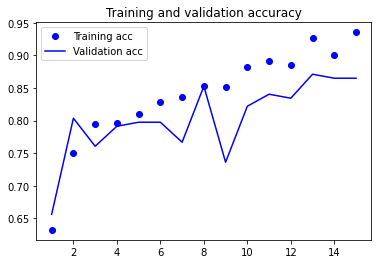

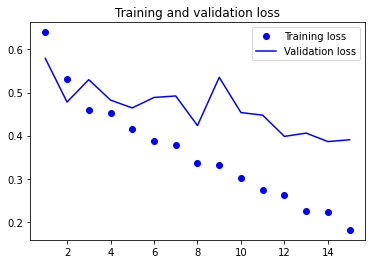

In [50]:
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()


In [51]:
model.save('male_female.h5')